### DFT validation of top predictions

In [1]:
import os
import sys
import numpy as np
# import psycopg2
import sqlalchemy
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    context='paper',
    font_scale=8/8.8,
#     context="talk",
    style='ticks',
    color_codes=True,
    rc={'legend.frameon': False})

plt.rcParams['svg.fonttype'] = 'none'

%matplotlib inline

In [2]:
print(np.__version__)
print(pd.__version__)

1.21.2
1.3.3


In [3]:
import nfp
print(nfp.__version__)

0.2.1


In [4]:
os.chdir('../')

In [5]:
print(os.getcwd())
sys.path.append('../../')
import rlmolecule
from rlmolecule.sql.run_config import RunConfig
from rlmolecule.sql import Base, Session
from rlmolecule.sql.tables import GameStore, RewardStore, StateStore

/home/jlaw/projects/arpa-e/crystals/rlmolecule/examples/crystal_energy


In [19]:
out_dir = "outputs/hull_energy_batt_origlatt/best_decor_per_comp_rew2"
dft_decomp_energies_file = f"{out_dir}/relaxed_energies_decomp.csv"
df = pd.read_csv(dft_decomp_energies_file, names=['id', 'energyperatom', 'decomp_energy'])
df.head(2)

,id,energyperatom,decomp_energy
0,Zn4Sn1P4_sg1_icsd_079005_2,-3.461966,0.127
1,Li1Y1Zn4P4_sg4_icsd_075430_3,-3.798984,0.137


In [45]:
pred_file = f"{out_dir}/pred_energies.csv"
df_pred = pd.read_csv(pred_file, index_col=0)
df_pred['pred_decomp_energy'] = -df_pred['pred_decomp_energy']
df_pred.head(2)

,pred_energyperatom,pred_decomp_energy
Zn1Sc1F5_sg194_icsd_646285_1,-5.982055,-3.025
Zn6N1P3_sg14_icsd_027070_1,-6.363924,-3.009


In [47]:
# now make a scatterplot
# df.set_index('id', inplace=True)
df['pred_decomp_energy'] = df_pred['pred_decomp_energy']
df['pred_energyperatom'] = df_pred['pred_energyperatom']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


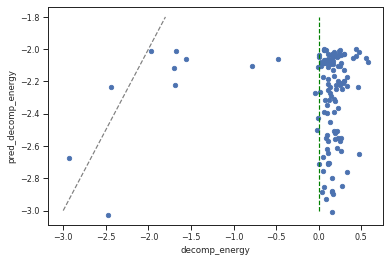

In [34]:
ax = df.plot.scatter(x='decomp_energy', y='pred_decomp_energy')
ax.plot([-3,-1.8], [-3,-1.8], ls='--', c='gray')
ax.plot([0,0], [-3,-1.8], ls='--', c='green')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


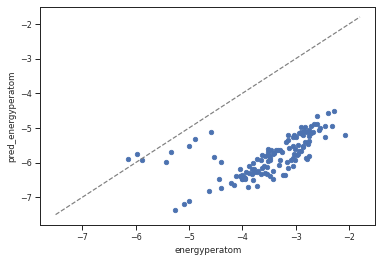

In [50]:
ax = df.plot.scatter(x="energyperatom", y="pred_energyperatom")
ax.plot([-7.5,-1.8], [-7.5,-1.8], ls='--', c='gray')

In [ ]:
# TODO now visualize these structures

In [41]:
print(df.to_csv(None))

id,energyperatom,decomp_energy,pred_decomp_energy
Zn4Sn1P4_sg1_icsd_079005_2,-3.461966289,0.127,-2.035
Li1Y1Zn4P4_sg4_icsd_075430_3,-3.798984403,0.137,-2.067
Zn5O2N2_sg84_icsd_065031_2,-4.153361333,0.0909999999999999,-2.395
Li2Zn2O3_sg2_icsd_024370_2,-4.536103849,-0.789,-2.105
Zn5Cl1N3_sg176_icsd_086036_1,-3.653529055,0.181,-2.507
Zn5I1N3_sg12_icsd_402124_1,-3.436448233,0.253,-2.569
Li1Zn3I1P2_sg12_icsd_420917_2,-2.885389183,0.165,-2.129
Mg1Sc1Zn1F7_sg63_icsd_092470_5,-5.338746694,-1.6709999999999998,-2.013
Zn3La1N3_sg19_icsd_014305_1,-5.001269745,-0.007,-2.109
K3Zn2Cd1P3_sg189_icsd_076297_2,-2.709429473,0.237,-2.011
Zn4Ti1P4_sg215_icsd_245406_1,-3.637777789,0.3369999999999999,-2.171
Zn5F1P3_sg176_icsd_086036_1,-3.151228721,0.0889999999999999,-2.931
K1Zn2S1P1_sg188_icsd_009751_1,-3.011222491,0.2229999999999999,-2.365
Na1Zn4P3_sg6_icsd_245989_1,-3.027641786,0.053,-2.667
K7I1N2_sg145_icsd_416169_1,-2.445706143,0.283,-2.207
Na1Y1Zn4N1P3_sg198_icsd_066317_3,-3.926864861,0.249,-2.101
Zn1Sc1

In [33]:
df[df['decomp_energy'] < 0]

,energyperatom,decomp_energy,pred_decomp_energy
id,,,
Li2Zn2O3_sg2_icsd_024370_2,-4.536104,-0.789,-2.105
Mg1Sc1Zn1F7_sg63_icsd_092470_5,-5.338747,-1.671,-2.013
Zn3La1N3_sg19_icsd_014305_1,-5.001270,-0.007,-2.109
Zn1Sc1Hg1F7_sg15_icsd_201526_3,-4.587877,-1.687,-2.223
Zn1Sc1F5_sg194_icsd_646285_1,-5.433996,-2.477,-3.025
Na1Sc2F7_sg137_icsd_028411_1,-6.151203,-2.927,-2.673
Zn5F1N3_sg14_icsd_419822_1,-4.003405,-0.021,-2.499
Li2Zn3O4_sg69_icsd_026267_1,-4.408535,-0.481,-2.059
Zn1Sc1Cd1F7_sg13_icsd_281208_4,-4.898243,-1.703,-2.117
